## Intro

The purpose of this project is to build a predictive model to classify whether a loan application will be approved or not based on the dataset provided by Kaggle, titled "Loan Approval Classification Data" (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data). 

Understanding the key factors influencing loan approval decisions is crucial for financial institutions to make informed and fair decisions. We will use a binomial regression model, such as logistic regression, to predict binary outcomes: approval (1) or rejection (0).

In [1]:
import pandas as pd

data = pd.read_csv('/Users/dingyiling/Desktop/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


The dataset contains 45,000 records and 14 variables, each described below:
| Column                          | Description                                                  | Type          |
|---------------------------------|--------------------------------------------------------------|---------------|
| person_age                      | Age of the person                                            | Float         |
| person_gender                   | Gender of the person (female, male)                          | Categorical   |
| person_education                | Highest education level (Master, High School, Bachelor, Associate, Doctorate) | Categorical   |
| person_income                   | Annual income                                               | Float         |
| person_emp_exp                  | Years of employment experience                              | Integer       |
| person_home_ownership           | Home ownership status (RENT, OWN, MORTGAGE, OTHER)           | Categorical   |
| loan_amnt                       | Loan amount requested                                        | Float         |
| loan_intent                     | Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION)   | Categorical   |
| loan_int_rate                   | Loan interest rate                                           | Float         |
| loan_percent_income             | Loan amount as a percentage of annual income                | Float         |
| cb_person_cred_hist_length      | Length of credit history in years                           | Float         |
| credit_score                    | Credit score of the person                                   | Integer       |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults (No, Yes)                        | Categorical   |
| loan_status (dependent variable)   | Loan approval status: 1 = approved; 0 = rejected            | Integer       |

In [3]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
# Assuming 'df' is your DataFrame
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Use a dictionary to store unique values for each column
unique_values = {column: data[column].unique() for column in categorical_columns}

# Print or access unique values
for column, values in unique_values.items():
    print(f"Unique values for {column}: {values}")

Unique values for person_gender: ['female' 'male']
Unique values for person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values for person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values for loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values for previous_loan_defaults_on_file: ['No' 'Yes']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


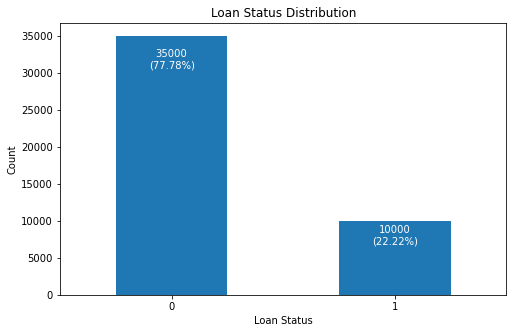

In [15]:
# Bar plot for loan_status - Target Variable
ax = data['loan_status'].value_counts().plot(kind='bar', title='Loan Status Distribution', figsize=(8, 5))
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Annotate the bar plot with counts and percentages
total = len(data)  # Total number of rows in the dataset
for p in ax.patches:
    count = int(p.get_height())  # Height of the bar (count)
    percentage = f"{count / total * 100:.2f}%"  # Calculate percentage
    # Annotate text slightly below the top of the bar
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.05 * p.get_height()), 
                ha='center', va='top', fontsize=10, color='white')

plt.show()

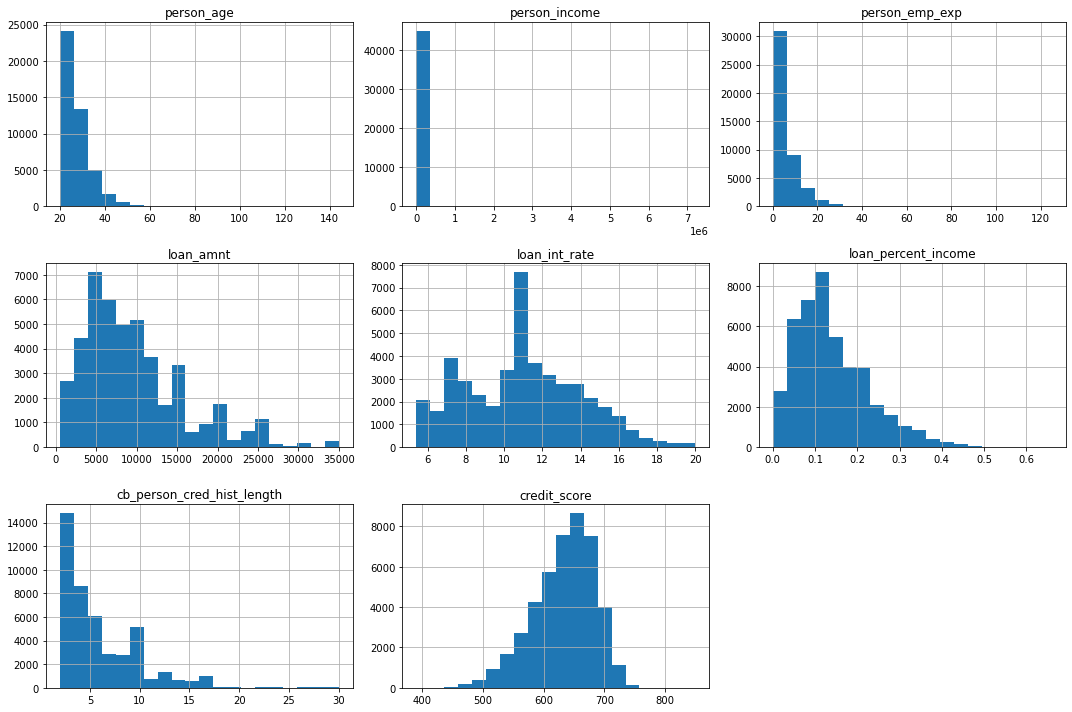

In [16]:
# Histograms for numerical columns
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

data[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

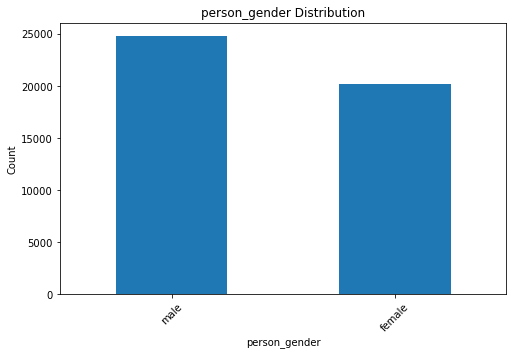

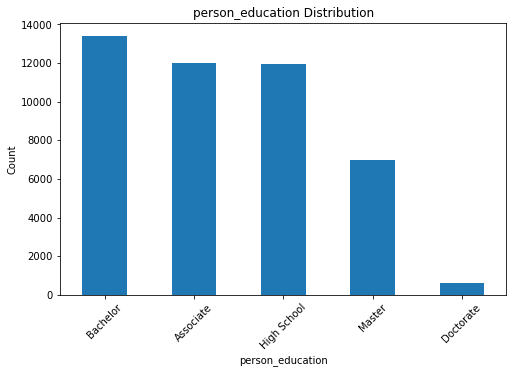

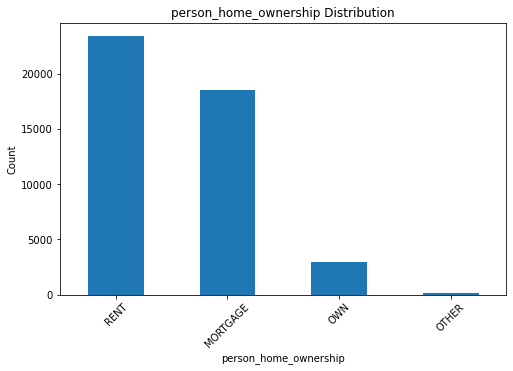

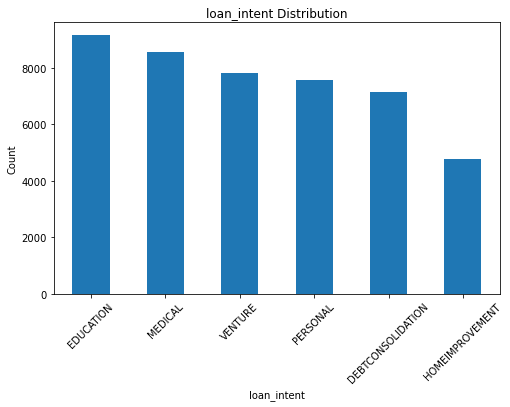

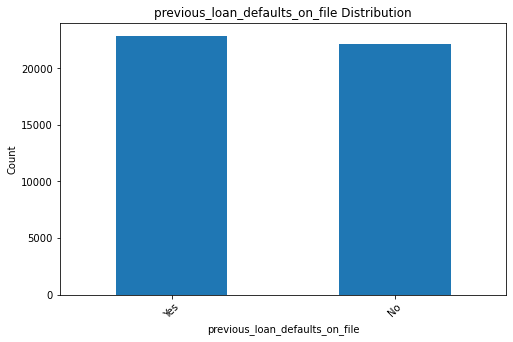

In [17]:
# Bar plots for categorical variables
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', title=f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

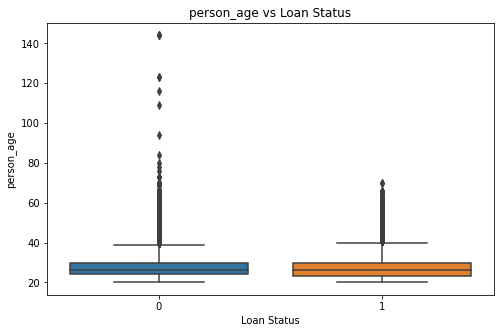

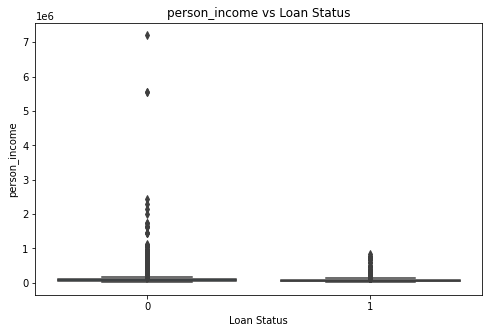

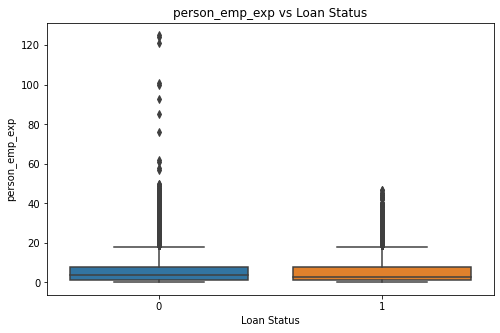

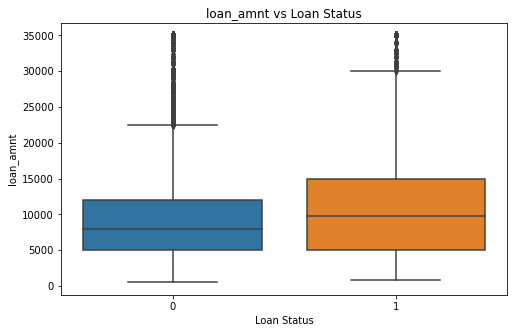

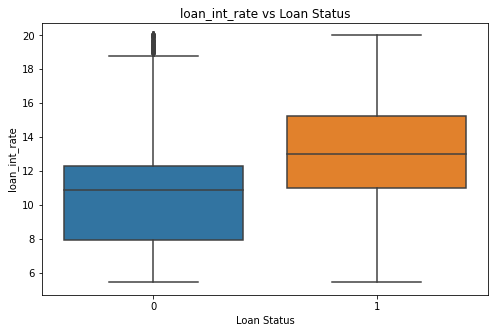

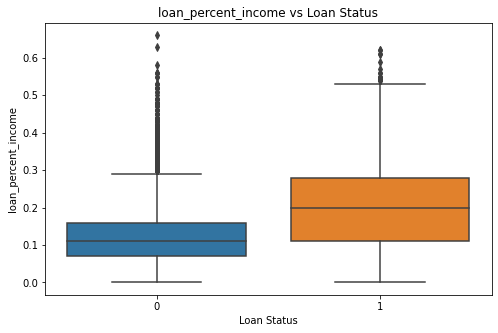

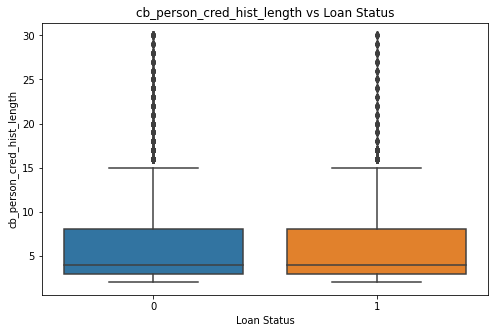

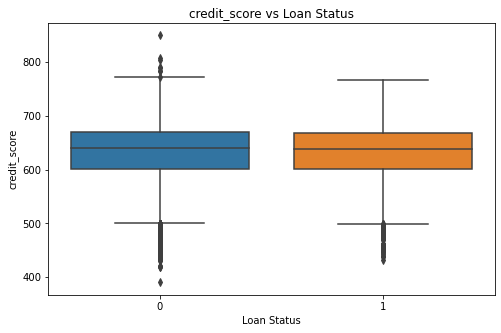

In [18]:
# Box Plots for Loan Status vs. Numerical Variables
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='loan_status', y=col)
    plt.title(f'{col} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
    plt.show()

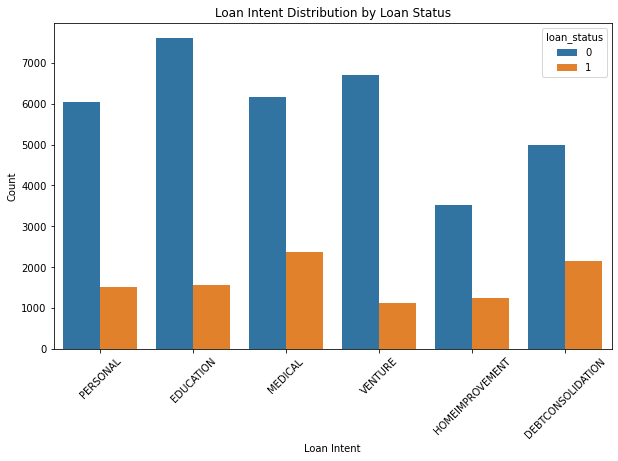

In [19]:
# Loan Intent Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan_intent', hue='loan_status')
plt.title('Loan Intent Distribution by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

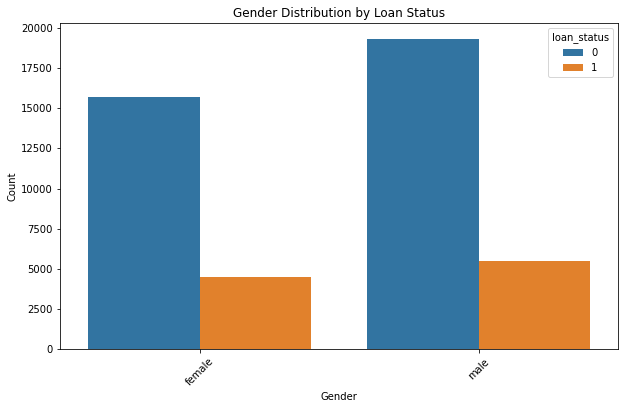

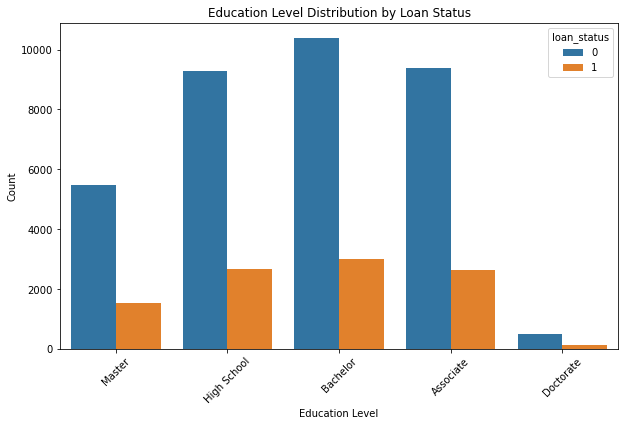

In [20]:
# Gender and Education Impact on Loan Approval
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='person_gender', hue='loan_status')
plt.title('Gender Distribution by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='person_education', hue='loan_status')
plt.title('Education Level Distribution by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

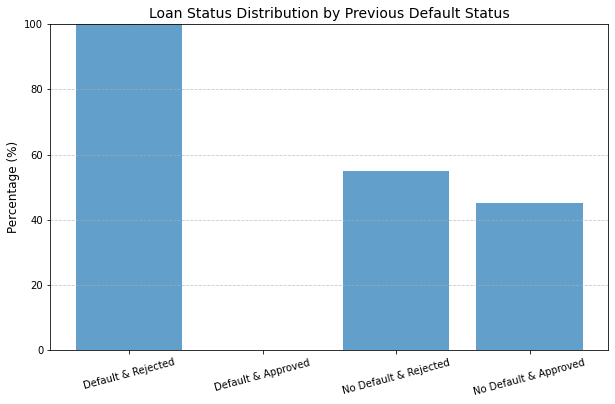

In [10]:
# Create a crosstab to compute counts
crosstab = pd.crosstab(data['previous_loan_defaults_on_file'], data['loan_status'], normalize='index') * 100

# Rename columns for clarity
crosstab.columns = ['Rejected', 'Approved']

# Separate percentages for easier plotting
percent_default_rejected = crosstab.loc['Yes', 'Rejected']
percent_default_approved = crosstab.loc['Yes', 'Approved']
percent_no_default_rejected = crosstab.loc['No', 'Rejected']
percent_no_default_approved = crosstab.loc['No', 'Approved']

# Create a bar plot
categories = ['Default & Rejected', 'Default & Approved', 'No Default & Rejected', 'No Default & Approved']
values = [percent_default_rejected, percent_default_approved, percent_no_default_rejected, percent_no_default_approved]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, alpha=0.7)
plt.title('Loan Status Distribution by Previous Default Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Data transformation

In [21]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,loan_status_label,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,Approved,...,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,Rejected,...,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,Approved,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,Approved,...,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,Approved,...,1,0,0,1,0,0,1,0,0,0


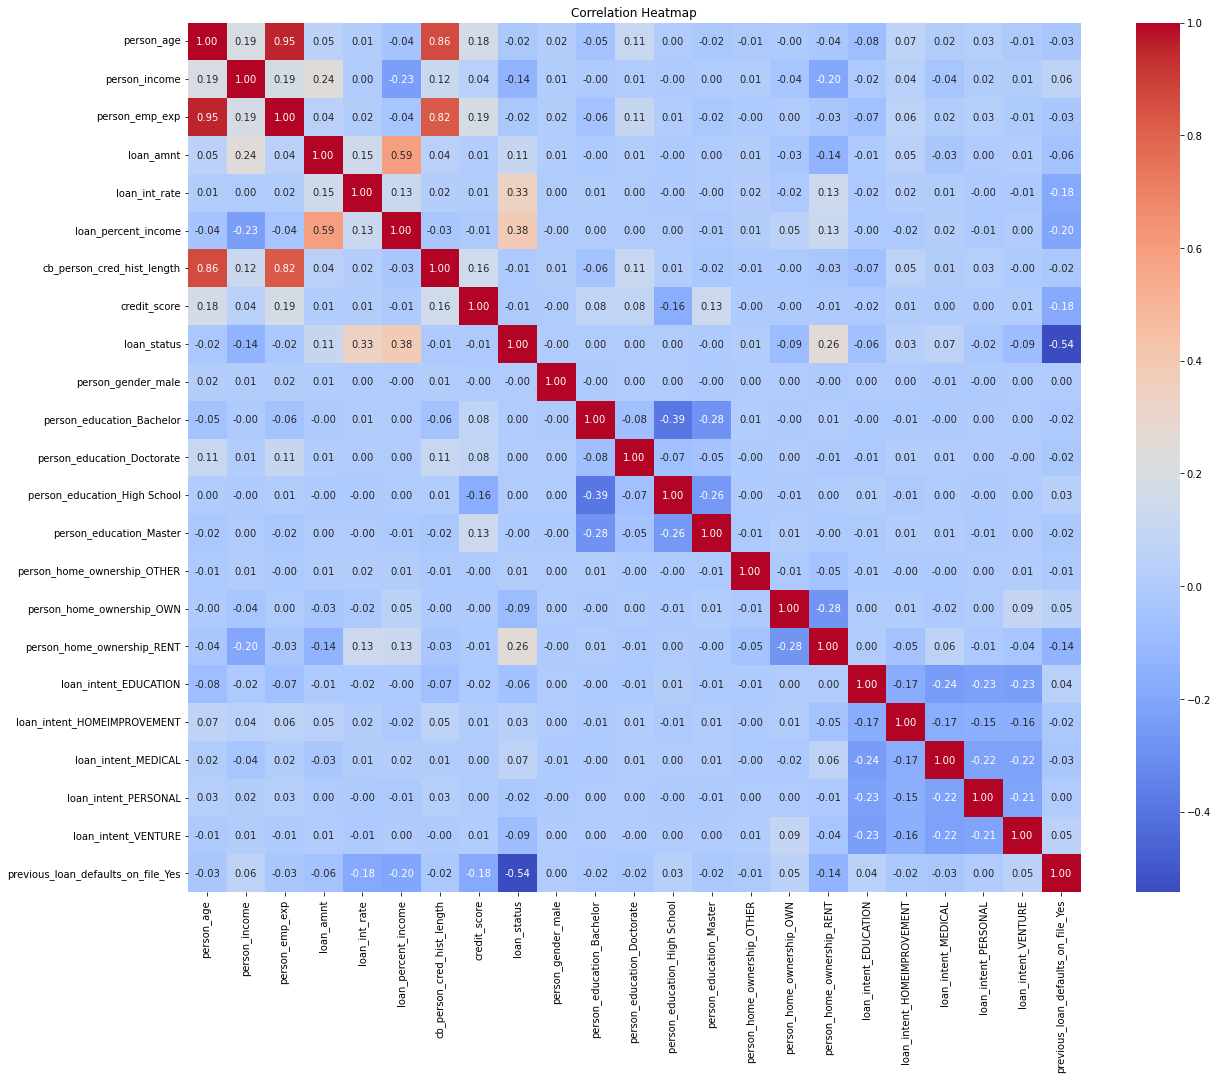

In [22]:
# Visualize correlations between numerical variables
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data processing

In [60]:
# Separate features and target
target_column = 'loan_status'  # Replace with the actual target column name
X = data.drop(columns=[target_column])
y = data[target_column]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [64]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [66]:
# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Output information
print(f"Training features shape: {X_train_processed.shape}")
print(f"Test features shape: {X_test_processed.shape}")


Training features shape: (36000, 27)
Test features shape: (9000, 27)


# Dimentionally Reduction

In [69]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.90)  # Retain 95% of the variance
X_train_reduced = pca.fit_transform(X_train_processed)
X_test_reduced = pca.transform(X_test_processed)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Number of Components Selected: {pca.n_components_}")
print(f"Explained Variance by Each Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")


print(f"Reduced Training Features Shape: {X_train_reduced.shape}")
print(f"Reduced Test Features Shape: {X_test_reduced.shape}")


Number of Components Selected: 13
Explained Variance by Each Component: [0.25854916 0.15056118 0.10347534 0.09002386 0.08538695 0.04447729
 0.04251796 0.03494547 0.02524566 0.02360276 0.02122187 0.01778828
 0.01707631]
Total Explained Variance: 0.9148720906326372
Reduced Training Features Shape: (36000, 13)
Reduced Test Features Shape: (9000, 13)


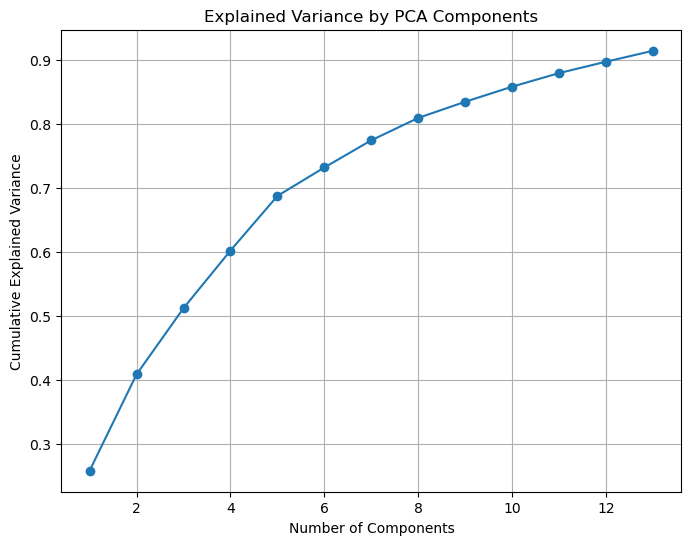

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


# Binomial regression models

### Model Selection:
#### Target: build a predictive model to classify whether a loan application will be approved or not
#### Reasons to Choose Binomial Regression:
##### 1.Binary Outcome: Binomial Regression is designed for binary(yes or no) classification tasks.
##### 2.Interpretability: It provides interpretable coefficients that explain the impact of each feature on the probability of approval.
##### 3.Efficiency: Binomial Regression is computationally efficient and works well even with relatively large datasets.
##### 4.Baseline Model: It serves as a strong baseline to compare with other models if needed.

In [100]:
import statsmodels.api as sm

# Add an intercept for the logistic regression model (statsmodels)
X_train_reduced_with_const = sm.add_constant(X_train_reduced)

# Fit the logistic regression model using statsmodels
logit_model = sm.GLM(y_train, X_train_reduced_with_const, family=sm.families.Binomial())
logit_results = logit_model.fit()

print("Statsmodels Logistic Regression Summary:")
print(logit_results.summary())

Statsmodels Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                36000
Model:                            GLM   Df Residuals:                    35986
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8007.0
Date:                Fri, 06 Dec 2024   Deviance:                       16014.
Time:                        18:41:57   Pearson chi2:                 1.81e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4588
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [102]:
# Extract key performance metrics
log_likelihood = logit_results.llf  # Log-Likelihood
deviance = logit_results.deviance  # Deviance
aic = logit_results.aic  # Akaike Information Criterion
bic = logit_results.bic  # Bayesian Information Criterion


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [108]:
# Display metrics from statsmodels
print("\nModel Performance Metrics from Statsmodels:")
metrics_summary = {
    "Log-Likelihood": log_likelihood,
    "Deviance": deviance,
    "AIC (Akaike Information Criterion)": aic,
    "BIC (Bayesian Information Criterion)": bic
}
for metric, value in metrics_summary.items():
    print(f"{metric}: {value:.4f}")



Model Performance Metrics from Statsmodels:
Log-Likelihood: -8007.0388
Deviance: 16014.0776
AIC (Akaike Information Criterion): 16042.0776
BIC (Bayesian Information Criterion): -361524.9164


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Instantiate the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the reduced training dataset
logistic_model.fit(X_train_reduced, y_train)
# Predict on the reduced test dataset
y_pred = logistic_model.predict(X_test_reduced)
y_prob = logistic_model.predict_proba(X_test_reduced)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_report_text = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy of Binomial Regression Model:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report_text)
print("Confusion Matrix:\n", confusion)

Accuracy of Binomial Regression Model: 0.8928888888888888
ROC-AUC Score: 0.9516168086605599

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.74      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Confusion Matrix:
 [[6558  432]
 [ 532 1478]]


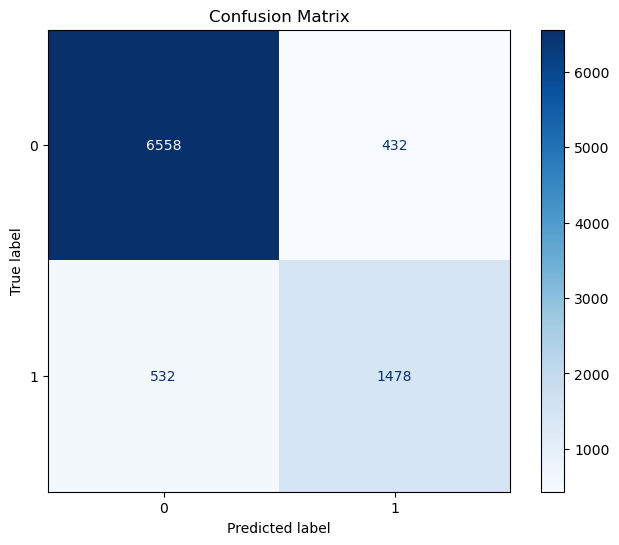

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Confusion matrix visualization
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_model.classes_).plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


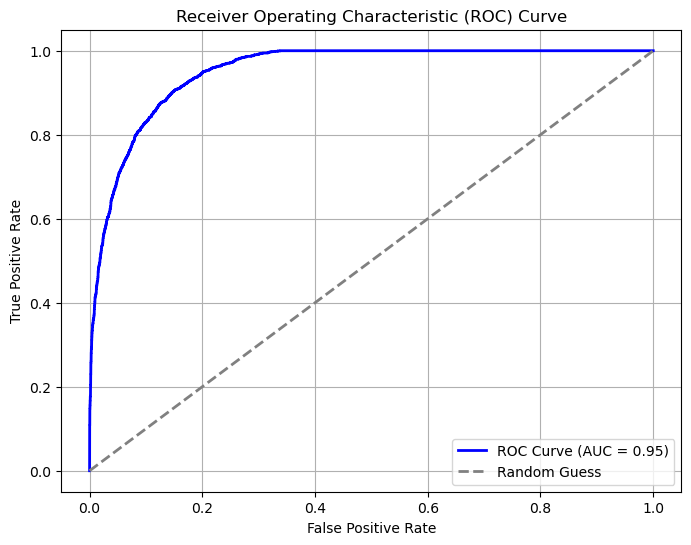

In [94]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
